In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("df_results_2_0")

In [3]:
data.reset_index(inplace=True)
data.drop("index", axis=1, inplace=True)

In [4]:
data

,Classifier,Precision,Recall,F1-score,Timestamp
0,Support Vector Machines,0.55,0.45,0.49,16052023_2133
1,Decision Tree,0.36,0.50,0.42,16052023_2133
2,Random Forest,0.75,0.60,0.67,16052023_2133
3,Neural Network,0.42,0.55,0.48,16052023_2133
4,Support Vector Machines,0.48,0.38,0.42,16052023_2207
...,...,...,...,...,...
107,Neural Network,0.48,0.52,0.50,17052023_0149
108,Support Vector Machines,0.64,0.45,0.53,17052023_0158
109,Decision Tree,0.54,0.35,0.42,17052023_0158
110,Random Forest,0.79,0.57,0.67,17052023_0158


In [5]:
data.groupby(by="Classifier").mean().round(2)

,Precision,Recall,F1-score
Classifier,,,
Decision Tree,0.43,0.46,0.42
Neural Network,0.41,0.52,0.45
Random Forest,0.75,0.58,0.65
Support Vector Machines,0.60,0.43,0.49


In [6]:
data.describe()

,Precision,Recall,F1-score
count,112.000000,112.000000,112.000000
mean,0.546339,0.497321,0.502143
std,0.166976,0.116827,0.106029
min,0.220000,0.250000,0.300000
25%,0.417500,0.420000,0.427500
50%,0.515000,0.480000,0.480000
75%,0.682500,0.570000,0.580000
max,0.940000,0.820000,0.820000


(0.3, 0.9)

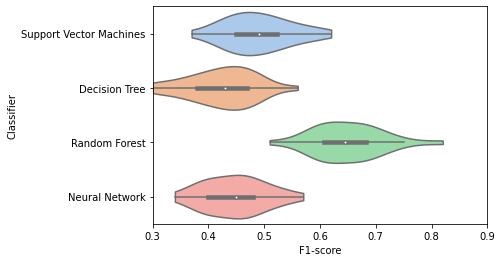

In [7]:
ax = sns.violinplot(data=data, y="Classifier", x="F1-score", orient="h", palette="pastel", showmeans=True, cut=0)
ax.set_xlim(0.3, 0.9)

(0.3, 0.8)

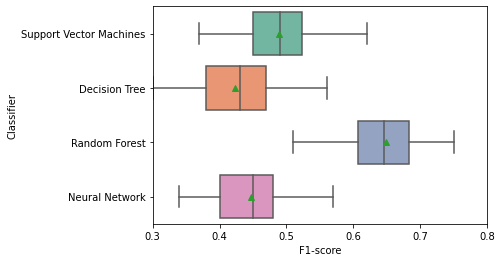

In [8]:
ax = sns.boxplot(data=data, y="Classifier", x="F1-score", orient="h", palette="Set2", showmeans=True)
# sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=ax)
ax.set_xlim(0.3, 0.8)

(0.2, 0.8)

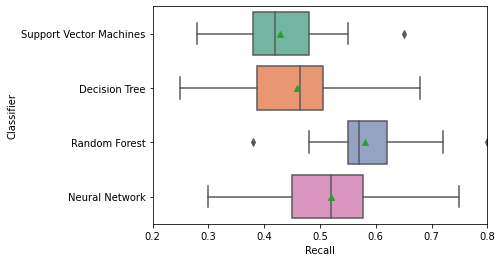

In [9]:
ax = sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", palette="Set2", showmeans=True)
ax.set_xlim(0.2, 0.8)

(0.2, 0.9)

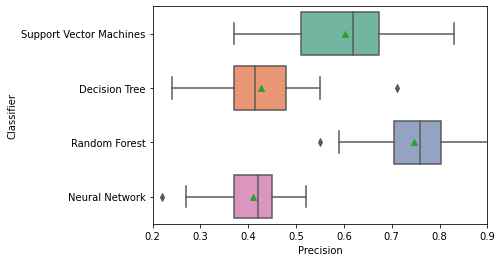

In [10]:
ax = sns.boxplot(data=data, y="Classifier", x="Precision", orient="h", palette="Set2", showmeans=True)
ax.set_xlim(0.2, 0.9)

In [35]:
# from matplotlib import pyplot as plt

# fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# ax1 = sns.boxplot(data=data, y="Classifier", x="F1-score", orient="h", color="white", showmeans=True, ax=axs[0])
# ax1.set_title("F1-score")

# ax2 = sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=axs[1])
# ax2.set_title("Recall")

# plt.tight_layout()
# plt.show()

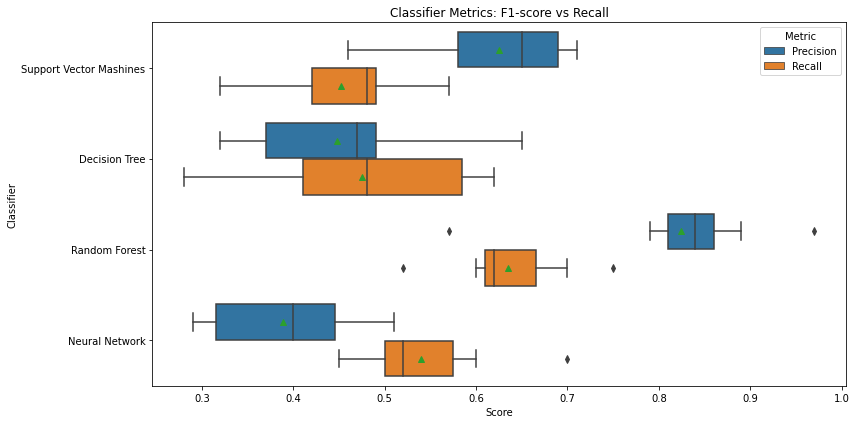

In [38]:
# Reshape the data
data_melted = pd.melt(data, id_vars='Classifier', value_vars=['Precision', 'Recall'], var_name='Metric', value_name='Score')

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data_melted, y="Classifier", x="Score", orient="h", hue="Metric", showmeans=True)
ax.set_title("Classifier Metrics: F1-score vs Recall")
plt.tight_layout()
plt.show()